In [1]:
%matplotlib ipympl

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


# Import own code
from algorithms import *
from plot_data import *
from signal_data_class import SignalData
from interactive_trigger_class import InteractiveTrigger

sb.set()

# SN1 = "../data/SN1_Chirp_300kHzTemplate_0p16SNR_280Start_Sig.npy"
# SN2 = "../data/SN2_Chirp_300kHzTemplate_0p32SNR_280Start_Sig.npy"
SX1 = "../data/SX1_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_99mV.npy"
# SX2 = "../data/SX2_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_132mV.npy"
# SX3 = "../data/SX3_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_264mV.npy"
# XN1 = "../data/XN1_Chirp_300kHzTemplate_0p16SNR_280Start_Noise.npy"
# XN2 = "../data/XN2_Chirp_300kHzTemplate_0p32SNR_280Start_Noise.npy"

SN3 = "../data/SN3_250Start_1msChirp_33Cycle_0p16SNR_Sig.npy"
SN4 = "../data/SN4_250Start_1msChirp_33Cycle_0p32SNR_Sig.npy"
XN3 = "../data/XN3_250Start_1msChirp_33Cycle_0p16SNR_Noise.npy"
XN4 = "../data/XN4_250Start_1msChirp_33Cycle_0p32SNR_Noise.npy"


In [2]:
data = {}

# data["SN1"] = np.array(list( zip(*np.load(SN1)) ))
# data["SN2"] = np.array(list( zip(*np.load(SN2)) ))
data["SX1"] = np.array(list( zip(*np.load(SX1)) ))
# data["SX2"] = np.array(list( zip(*np.load(SX2)) ))
# data["SX3"] = np.array(list( zip(*np.load(SX3)) ))
# data["XN1"] = np.array(list( zip(*np.load(XN1)) ))
# data["XN2"] = np.array(list( zip(*np.load(XN2)) ))

data["SN3"] = np.array(list( zip(*np.load(SN3)) ))
data["SN4"] = np.array(list( zip(*np.load(SN4)) ))
# data["XN3"] = np.array(list( zip(*np.load(XN3)) ))
# data["XN4"] = np.array(list( zip(*np.load(XN4)) ))


SX1_truth_data_df = pd.read_csv("../data/SX1_truth_data.csv")
SX1_truth_data = SX1_truth_data_df.truth_data

SN4_new_td = data["SN4"][2] > 0


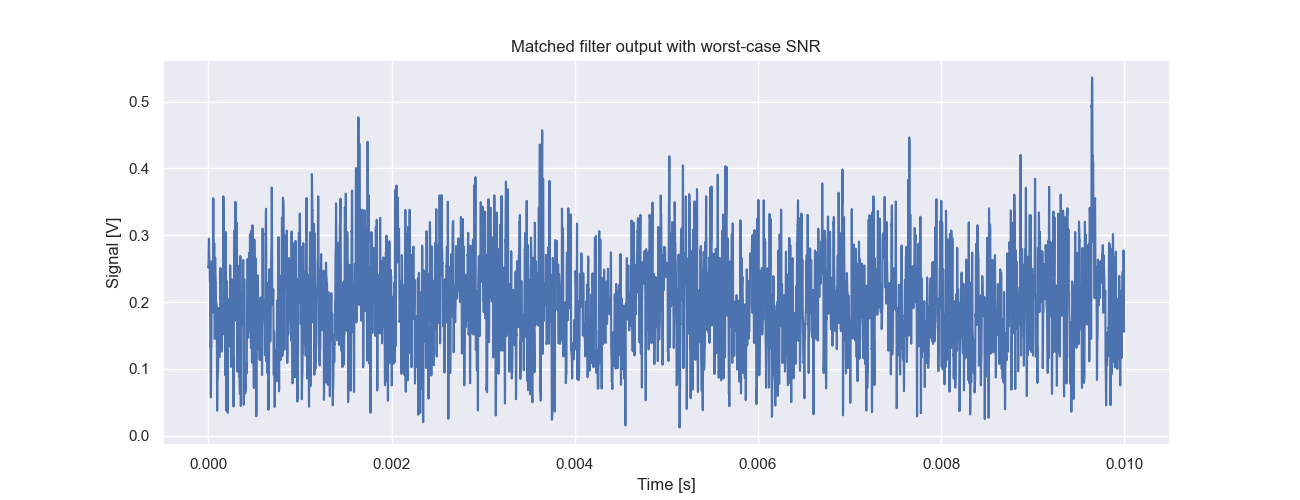

In [3]:
cut = 5000

fig, axis = plt.subplots(1, 1, figsize=FIGSIZE)
# fig.suptitle(title)
# fig.tight_layout()

axis.set_title("Matched filter output with worst-case SNR")
# cmap = plt.get_cmap("plasma")
axis.set_xlabel("Time [s]")
axis.set_ylabel("Signal [V]")
axis.plot(data["SN3"][0][0:cut], data["SN3"][1][0:cut])

1132142352453434 <class 'numpy.float64'>


Label(value='Hitrate: 0.0')

Label(value='Misfire rate: 1.0')

interactive(children=(IntSlider(value=900, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

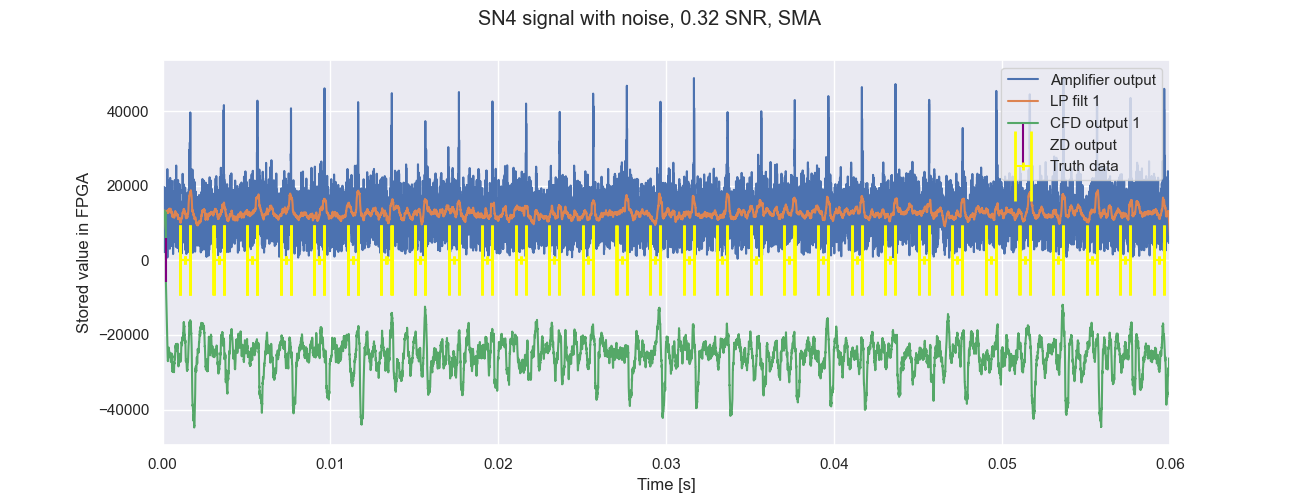

In [4]:
image4_2 = InteractiveTrigger(
        data["SN4"][0],
        data["SN4"][1],
        truth_data = SN4_new_td,
        title = "SN4 signal with noise, 0.32 SNR, SMA",
        filter = sma_convolve_extracted,
        tolerance = 300e-6,
        slice_end = 30_000,
    )
image4_2.show()


1132142352453434 <class 'numpy.float64'>


Label(value='Hitrate: 1.0')

Label(value='Misfire rate: 0.6851851851851852')

interactive(children=(IntSlider(value=900, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

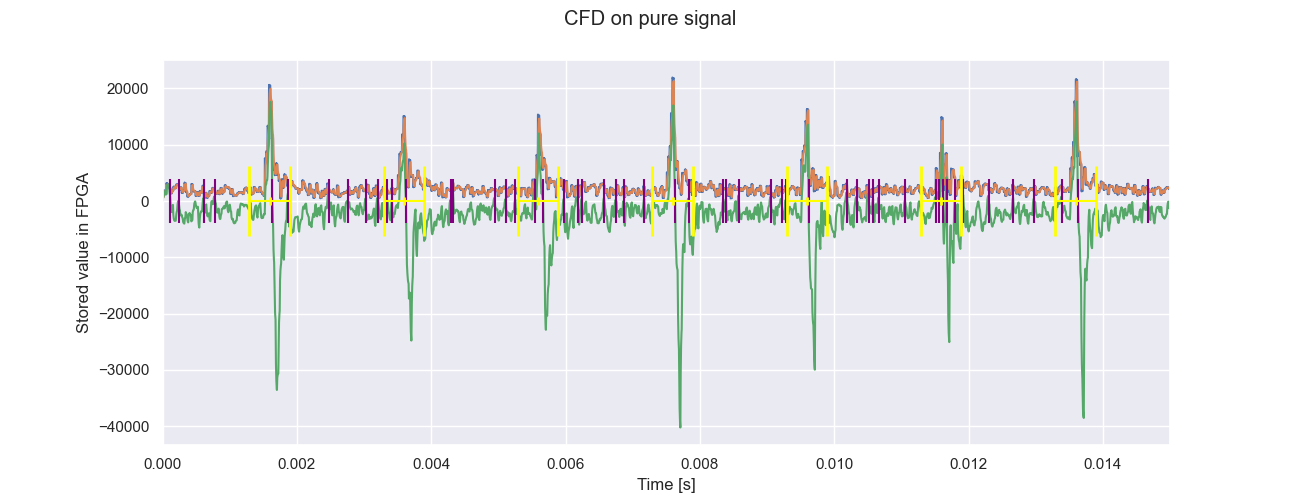

In [5]:
image1 = InteractiveTrigger(
        *data["SX1"],
        truth_data = SX1_truth_data,
        inv_frac = 2,
        title = "CFD on pure signal",
        tolerance = 300e-6,
        # slice_end = cut,
        slice_end = 15_000,
        show_legend = False,
    )
image1.show()


interactive(children=(IntSlider(value=900, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

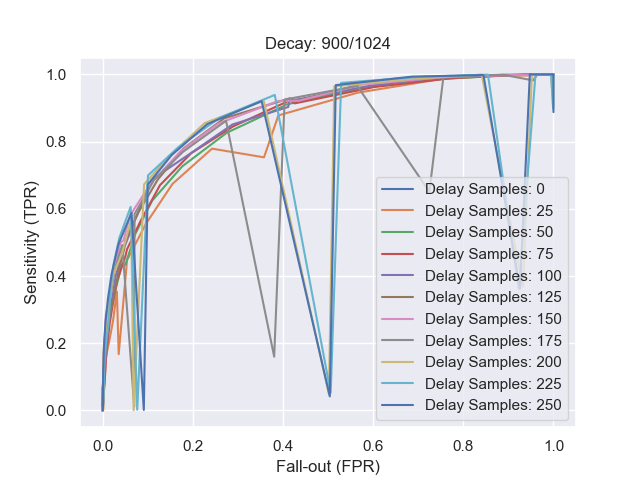

In [9]:
file = "../data/vary_filter_roc_data - SN4, IIR, LPx1, Tol 1s, inv_frac fine.csv"
pd_analyse = pd.read_csv(file)
# plot_roc_curves_iir(pd_analyse, title="SN4, IIR, LPx1, Tol 1s, inv_frac fine")
plot_roc_curves_iir(pd_analyse, title="")
print()


interactive(children=(IntSlider(value=900, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

<function __main__.update(decay_part)>

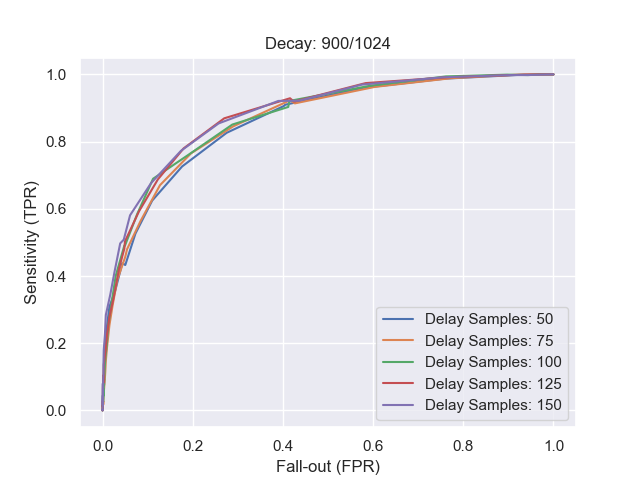

In [7]:
df = pd_analyse
# title = "???"
show_legend = True

fig, axis = plt.subplots()
# fig.suptitle(title)
axis.set_xlim(0, 1)
axis.set_ylim(0, 1.1)

# delay_samples_vals = np.sort(df.delay_samples.unique())
delay_samples_vals = np.arange(50, 150 + 1, 25)
df.sort_values(by=["specificity"], inplace=True)  # So that the plot lines are sensible

# Find decay_part values
decay_part_vals = np.sort(df.decay_part.unique())
decay_part_lower = decay_part_vals[0]
decay_part_upper = decay_part_vals[-1]
decay_part_step = decay_part_vals[1] - decay_part_vals[0]
decay_part_slider = IntSlider(min=decay_part_lower, max=decay_part_upper, step=decay_part_step,
                              value=decay_part_lower, description="Decay part / 1024",
                              layout=Layout(width="50%"), )

def update(decay_part):
    axis.cla()
    axis.set_title(f"Decay: {decay_part}/1024")
    axis.set_xlabel("Fall-out (FPR)")
    axis.set_ylabel("Sensitivity (TPR)")
    df_decay_part = df[df.decay_part == decay_part]
    for delay_samples in delay_samples_vals:
        filtered_df = df_decay_part[df_decay_part.delay_samples == delay_samples]
        sensitivities = filtered_df.sensitivity
        specificities = filtered_df.specificity
        fallouts = 1 - specificities
        axis.plot(fallouts, sensitivities, label=f"Delay Samples: {delay_samples}")
    if show_legend:
        axis.legend()

interact(update, decay_part=decay_part_slider)


interactive(children=(IntSlider(value=900, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

<function __main__.update(decay_part)>

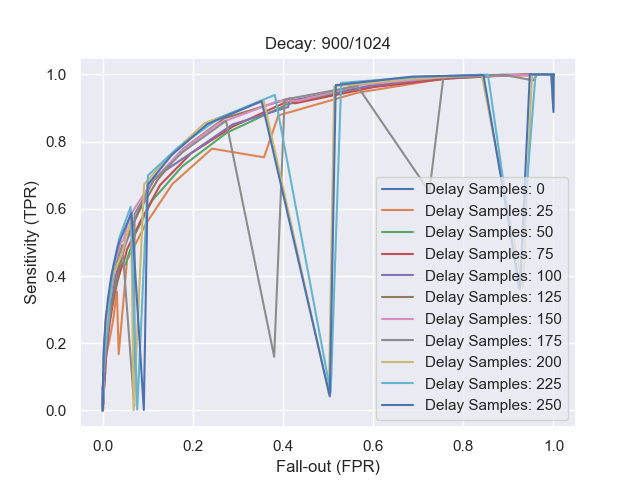

In [12]:
df = pd_analyse
# title = "???"
show_legend = True

fig, axis = plt.subplots()
# fig.suptitle(title)
axis.set_xlim(0, 1)
axis.set_ylim(0, 1.1)

# delay_samples_vals = np.sort(df.delay_samples.unique())
delay_samples_vals = np.arange(00, 250 + 1, 25)
df.sort_values(by=["specificity"], inplace=True)  # So that the plot lines are sensible

# Find decay_part values
decay_part_vals = np.sort(df.decay_part.unique())
decay_part_lower = decay_part_vals[0]
decay_part_upper = decay_part_vals[-1]
decay_part_step = decay_part_vals[1] - decay_part_vals[0]
decay_part_slider = IntSlider(min=decay_part_lower, max=decay_part_upper, step=decay_part_step,
                              value=decay_part_lower, description="Decay part / 1024",
                              layout=Layout(width="50%"), )

def update(decay_part):
    axis.cla()
    axis.set_title(f"Decay: {decay_part}/1024")
    axis.set_xlabel("Fall-out (FPR)")
    axis.set_ylabel("Sensitivity (TPR)")
    df_decay_part = df[df.decay_part == decay_part]
    for delay_samples in delay_samples_vals:
        filtered_df = df_decay_part[df_decay_part.delay_samples == delay_samples]
        sensitivities = filtered_df.sensitivity
        specificities = filtered_df.specificity
        fallouts = 1 - specificities
        axis.plot(fallouts, sensitivities, label=f"Delay Samples: {delay_samples}")
    if show_legend:
        axis.legend(loc="lower right")

interact(update, decay_part=decay_part_slider)
